In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [120]:
pop = pd.read_csv('Population_by_Age_Group_County_Harris.csv')
pop = pop[['Category', 'Harris % By Age Group']]
pop = pop.truncate(before=4)
pop.reset_index()

,index,Category,Harris % By Age Group
0,4,18-20,4.03
1,5,21-24,5.29
2,6,25-34,15.05
3,7,35-44,14.48
4,8,45-54,12.46
5,9,55-64,10.71
6,10,65-74,7.44
7,11,75-84,3.33
8,12,85+,1.12


In [121]:
voters = pd.read_csv('voters.csv', low_memory=False)
voters

,Unnamed: 0,Voter ID,VOTE_TYPE,CITY,ZIP,SEX,BIRTHYEAR,Voting Precinct
0,0,1102134232.00,P,HOUSTON,77007,M,1952,1
1,1,1102253308.00,P,HOUSTON,77009,F,1947,1
2,2,1102030272.00,E,HOUSTON,77007,F,1944,1
3,3,1102253312.00,M,HOUSTON,77009,F,1948,1
4,4,1102253349.00,P,HOUSTON,77009,M,1949,1
...,...,...,...,...,...,...,...,...
976504,207396,2194023638.00,P,CYPRESS,77429,F,1952.0,1151
976505,207397,2193150950.00,P,TOMBALL,77377,F,2004.0,1151
976506,207398,2140341941.00,E,TOMBALL,77377,F,1998.0,1151
976507,207399,2194037695.00,P,HUFFMAN,77336,F,2004.0,1152


In [130]:
age_bins = list(pop['Category'])
for x in range(len(age_bins)):
    if "-" in age_bins[x]:
        age_bins[x] = tuple(age_bins[x].split("-"))
    else:
        age_bins[x] = (age_bins[x][:-1], 1000)
print(age_bins)

[('18', '20'), ('21', '24'), ('25', '34'), ('35', '44'), ('45', '54'), ('55', '64'), ('65', '74'), ('75', '84'), ('85', 1000)]


In [131]:
print(voters.shape)
voters = voters[voters['BIRTHYEAR'] != '10/31/2022 0:00']
voters.dropna(inplace=True)
voters['BIRTHYEAR'] = voters['BIRTHYEAR'].astype('float64')
voters['BIRTHYEAR'] = voters['BIRTHYEAR'].astype('int64')
print(voters.shape)

vap_dist = []
for age_bin in age_bins:
    top = int(age_bin[1])
    bottom = int(age_bin[0])
    temp = voters[voters['BIRTHYEAR'] <= (2022 - bottom)]
    temp = temp[temp['BIRTHYEAR'] >= (2022 - top)]
    vap_dist.append(round((temp.shape[0]/voters.shape[0])*100, 2))

s = 0
for x in vap_dist:
    s += x
    
print(s)
age_dist =list(pop["Harris % By Age Group"])
print(age_dist)
print(vap_dist)

(953283, 8)
(953283, 8)
99.99000000000001
[4.03, 5.29, 15.05, 14.48, 12.46, 10.71, 7.44, 3.33, 1.12]
[2.72, 4.12, 12.69, 15.06, 16.73, 19.62, 18.2, 8.78, 2.07]


['18-20', '21-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']


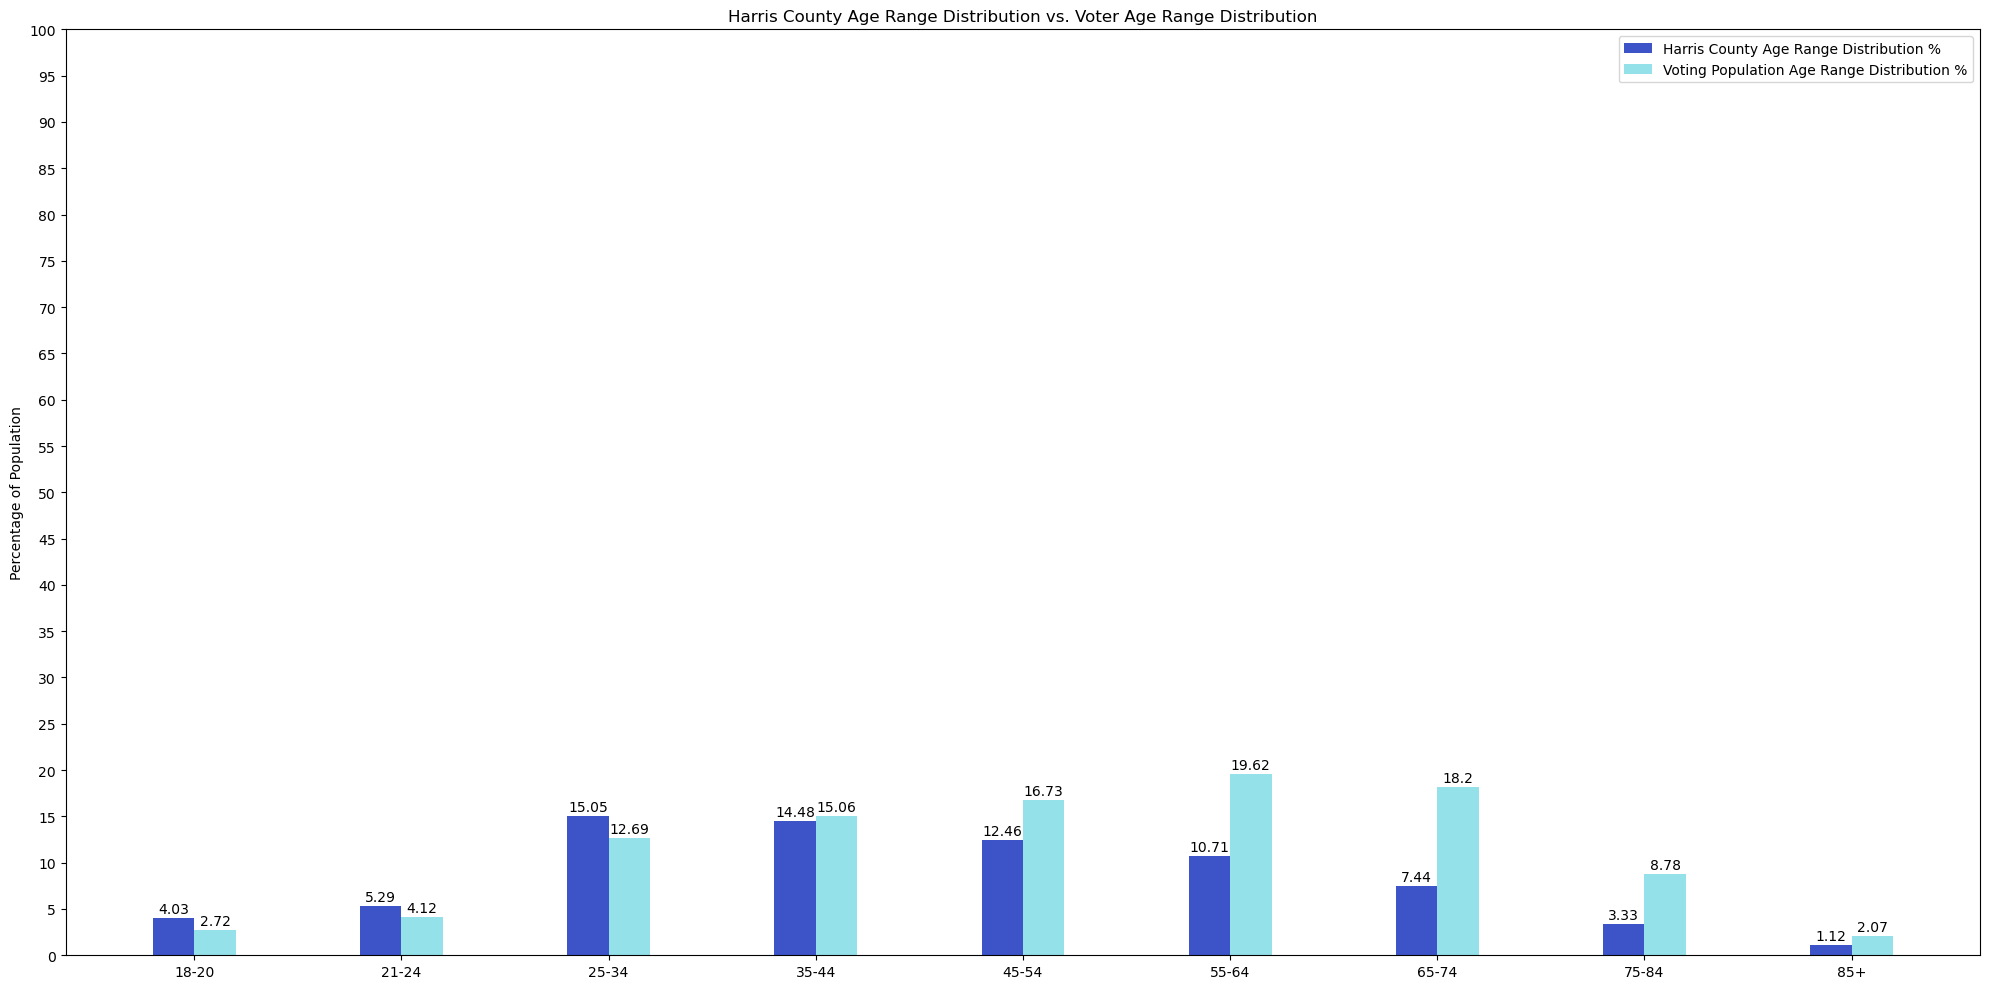

In [133]:
labels = [str(bottom)+"-"+str(top) for bottom, top in age_bins][:-1]
labels.append('85+')

print(labels)

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
age_bars = ax.bar(x - width/2, age_dist, width, label="Harris County Age Range Distribution %", color='#3d54c8')
vap_bars = ax.bar(x + width/2, vap_dist, width, label="Voting Population Age Range Distribution %", color='#95e1e9')

ax.set_ylabel('Percentage of Population')
ax.set_title('Harris County Age Range Distribution vs. Voter Age Range Distribution')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(age_bars, padding=1.5)
ax.bar_label(vap_bars, padding=1.5)

for ax in fig.axes:
    ax.yaxis.set_major_locator(MultipleLocator(5))
    
ax.set_ylim(0, 100)
fig.set_size_inches(20, 10)
fig.tight_layout()
plt.show()

